In [42]:
from scipy.stats import norm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### 확률밀도함수 : norm.pdf
#### 누적분포함수 : norm.cdf
#### 누적분포의 역함수 : norm.ppf
#### 난수를 생성하는 함수 : norm.rvs

##### [과제] 평균이 4, 표준편차가 0.8인 정규분포를 따르는 모집단으로부터 10000개의 표본을 추출하여 저장하고 그 중 10개를 출력하세요

In [1]:
np.random.seed(0)

pop = norm(loc = 4, scale = 0.8)
sample = pop.rvs(10000)
sample[:10]

NameError: name 'norm' is not defined

##### [과제] 위 과제에서 10000개의 표본의 평균 및 표준편차를 구하고 시각화하여 정규분표를 따르는지 확인하세요

3.9852530238733874
0.7900452545408967


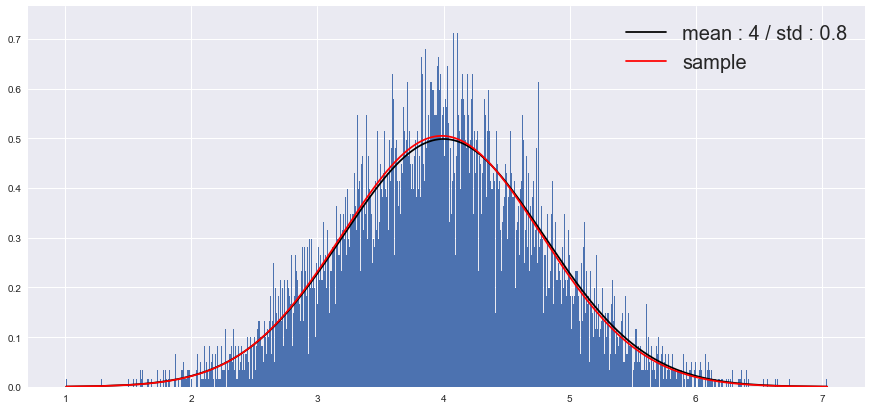

In [28]:
print(sample.mean()) 
print(sample.std()) 

# plt.rc('font', family = 'Malgun')
# plt.rcParams['axes.unicode_minus'] = False
plt.style.use('seaborn')
fig = plt.figure(figsize = (15, 7))

ax1 = fig.add_subplot(111)
plt.hist(sample, bins = 1000, density = True)

x = sample
x.sort()

y = norm(4, 0.8).pdf(x)
y1 = norm(sample.mean(), sample.std()).pdf(x)

plt.plot(x, y, color = 'black')
plt.plot(x, y1, color = 'red')

plt.legend(['mean : 4 / std : 0.8', 'sample'], fontsize = 20)
# x = np.linspace(-4, 4, 10000)
# y = (1 / np.sqrt(2 * np.pi)) * np.exp(-x ** 2 / 2)

# ax2 = fig.add_subplot(122)
# sns.histplot((sample - sample.mean()), bins = 1000, kde = True) 

plt.show()
plt.close()

무작위 표본평균: 3.99
무작위 표본 표준편차: 0.79


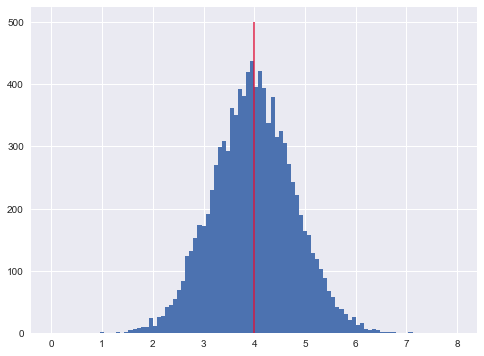

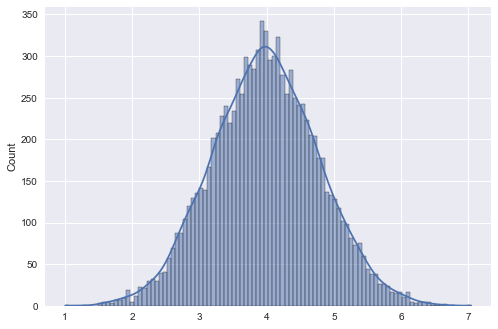

In [29]:
print(f'''무작위 표본평균: {sample.mean().round(2)}
무작위 표본 표준편차: {sample.std().round(2)}''')

plt.figure(figsize=(8,6))
plt.hist(sample,bins=100, range=(0,8))
plt.vlines(4, 0, 500, color='crimson',alpha=0.8) # 모평균 표시
plt.show()
sns.histplot(sample,bins=100, kde=True) # sns 버전, 확률밀도함수 on
plt.show()


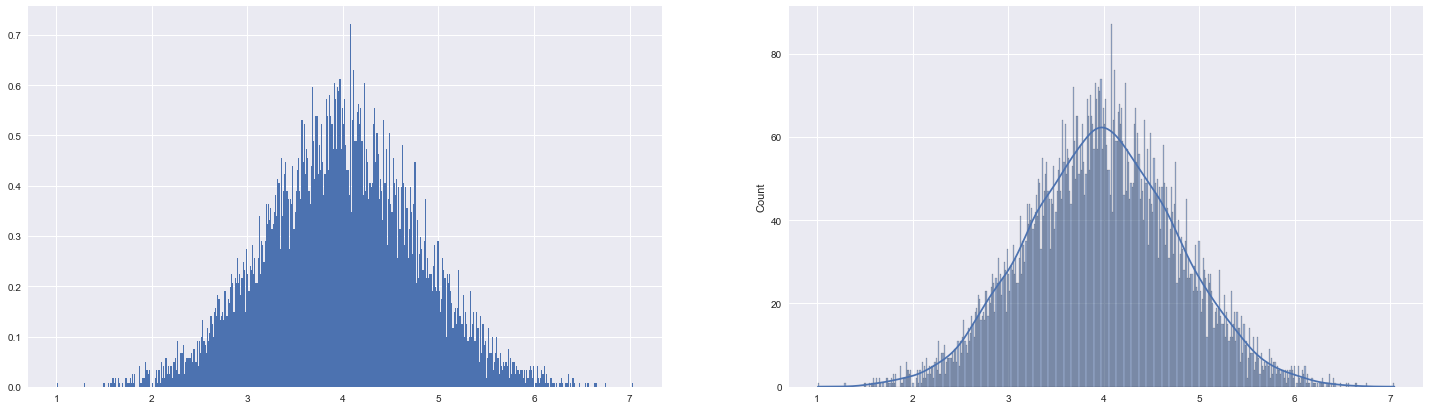

In [5]:
plt.style.use('seaborn')
fig = plt.figure(figsize = (25, 7))

ax1 = fig.add_subplot(121)
ax1.hist(sample, bins = 500, density = True) # 상대 빈도

ax2 = fig.add_subplot(122)
sns.histplot(sample, bins = 500, kde = True) # 빈도
plt.show()
plt.close()

##### [도전과제] 샘플사이즈를 순차적으로 늘렸을 때 표본평균이 모평균(4)에 가까워짐을 시각화하여 입증하세요

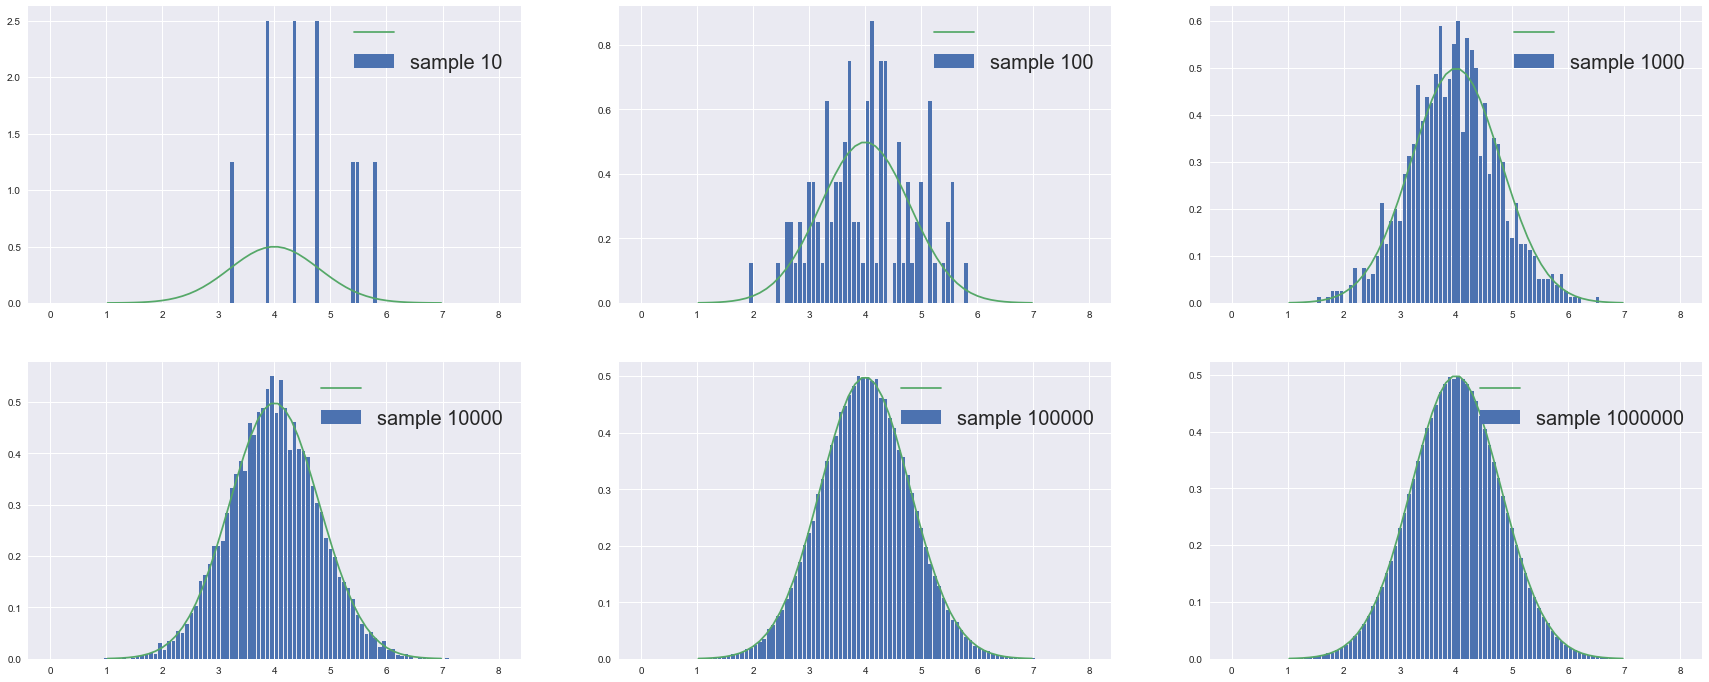

In [33]:
np.random.seed(0)
plt.style.use('seaborn')

sample1 = pop.rvs(10)
sample1.sort()
sample2 = pop.rvs(100)
sample2.sort()
sample3 = pop.rvs(1000)
sample3.sort()
sample4 = pop.rvs(10000)
sample4.sort()
sample5 = pop.rvs(100000)
sample5.sort()
sample6 = pop.rvs(1000000)
sample6.sort()

fig = plt.figure(figsize = (30, 12))
ax1 = fig.add_subplot(231)
ax2 = fig.add_subplot(232)
ax3 = fig.add_subplot(233)
ax4 = fig.add_subplot(234)
ax5 = fig.add_subplot(235)
ax6 = fig.add_subplot(236)

ax1.hist(sample1, bins = 100, range = (0, 8), density = True, rwidth = 0.8)
ax2.hist(sample2, bins = 100, range = (0, 8), density = True, rwidth = 0.8)
ax3.hist(sample3, bins = 100, range = (0, 8), density = True, rwidth = 0.8)
ax4.hist(sample4, bins = 100, range = (0, 8), density = True, rwidth = 0.8)
ax5.hist(sample5, bins = 100, range = (0, 8), density = True, rwidth = 0.8)
ax6.hist(sample6, bins = 100, range = (0, 8), density = True, rwidth = 0.8)

# 표준평균분포 - 평균 : 4 / 표준편차 : 0.8 / 신뢰구간 : 0.01~99.99%
norm_ = norm(4, 0.8)

x = np.linspace(norm_.ppf(0.0001), norm_.ppf(0.9999)) # norm() 함수를 사용하여 그래프 그리기
y = norm_.pdf(x)

ax1.plot(x, y)
ax2.plot(x, y)
ax3.plot(x, y)
ax4.plot(x, y)
ax5.plot(x, y)
ax6.plot(x, y)

ax1.legend(['', 'sample 10'], fontsize = 20)
ax2.legend(['', 'sample 100'], fontsize = 20)
ax3.legend(['', 'sample 1000'], fontsize = 20)
ax4.legend(['', 'sample 10000'], fontsize = 20)
ax5.legend(['', 'sample 100000'], fontsize = 20)
ax6.legend(['', 'sample 1000000'], fontsize = 20)


C:\Users\spiner\anaconda3\envs\cakd5\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(100.0, 10000.0, 3.8, 4.2)

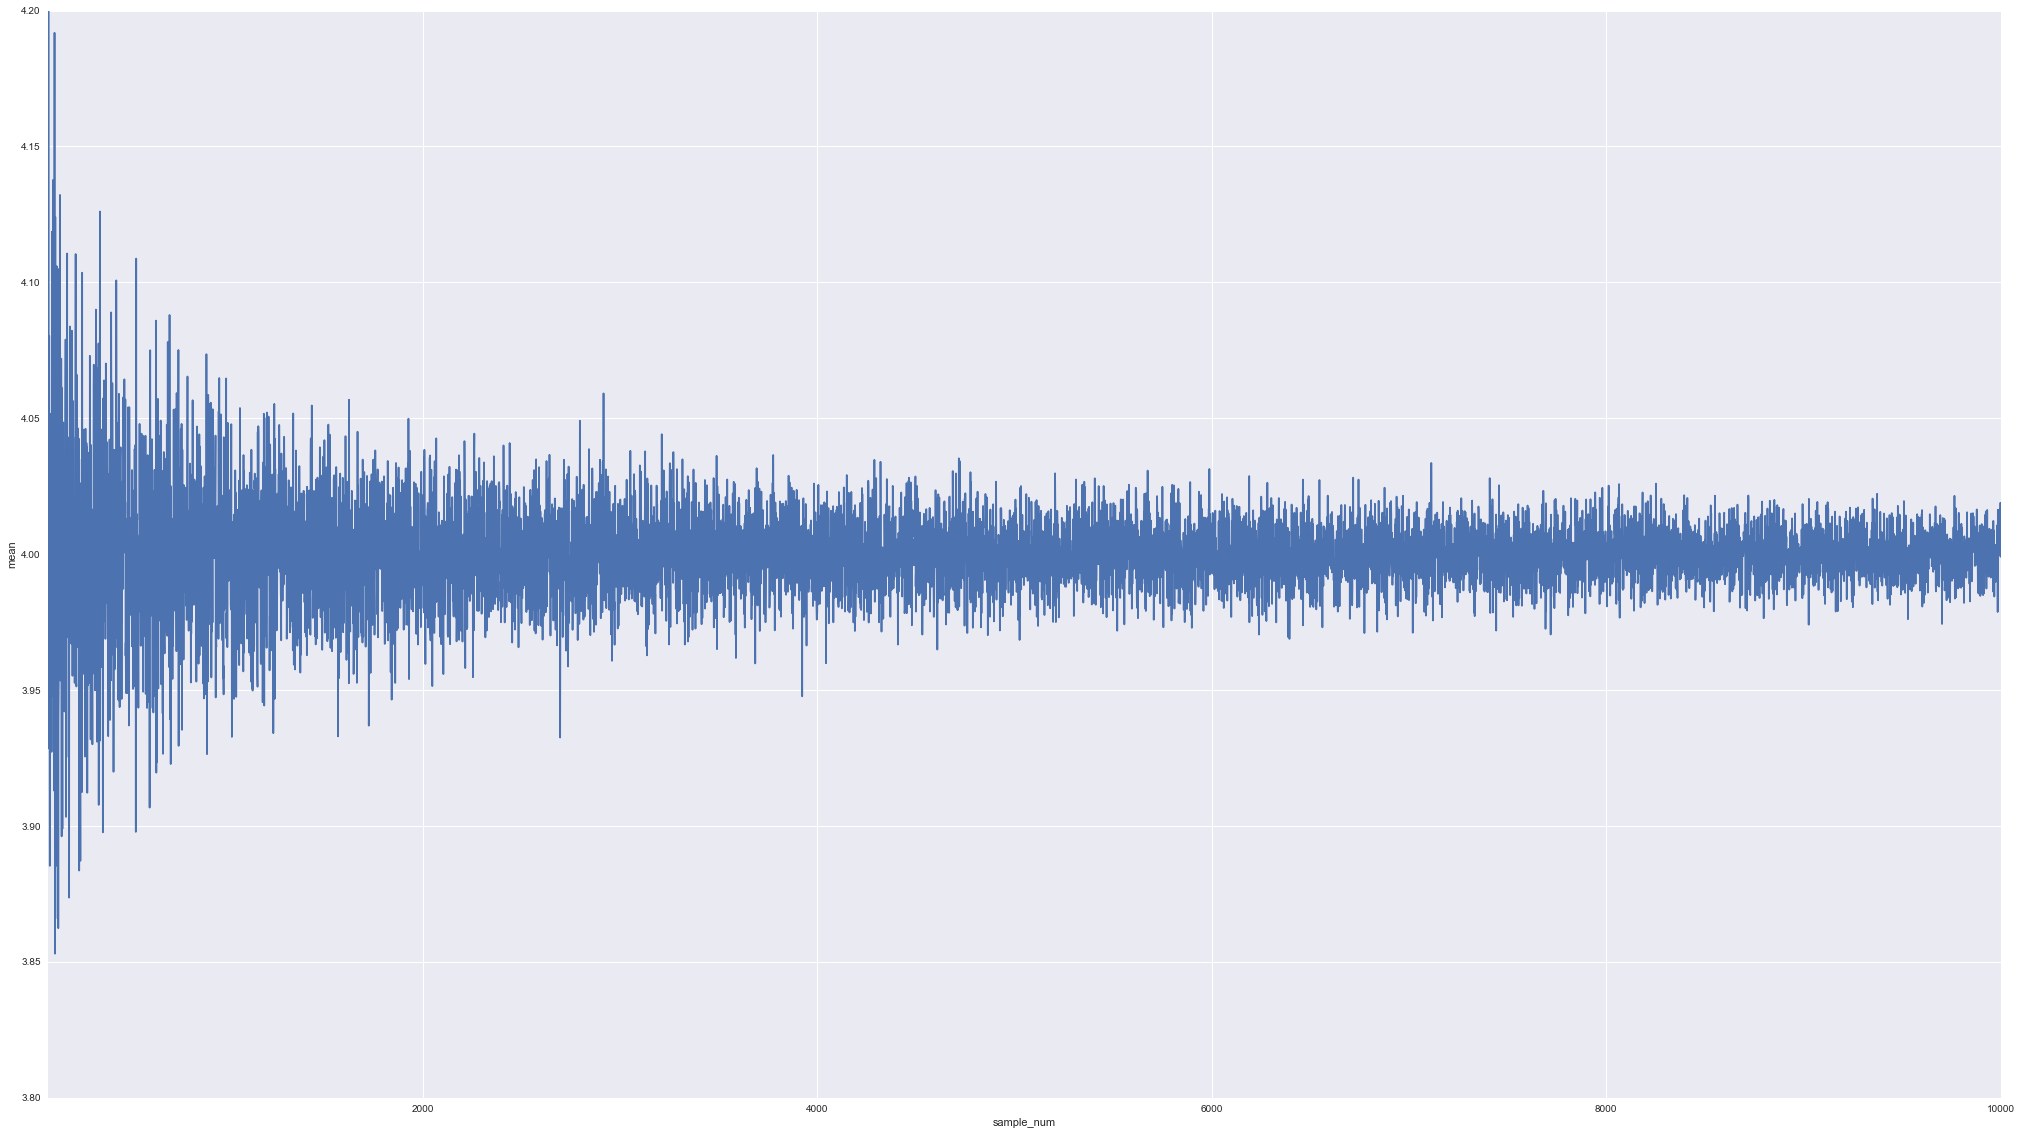

In [30]:
from scipy.stats import norm
import seaborn as sns
result = pd.DataFrame(columns=['sample_num','mean'])
for i in range(100,10001):
    pop = norm(loc=4,scale=0.8)
    choice = pop.rvs(size=i)
    mean=choice.mean()
    result = result.append(pd.DataFrame([[i, mean]], columns=['sample_num', 'mean']), ignore_index=True)
fig = plt.figure(figsize=(35,20))
sns.lineplot('sample_num','mean',data=result)
plt.axis([100,10000,3.8,4.2])


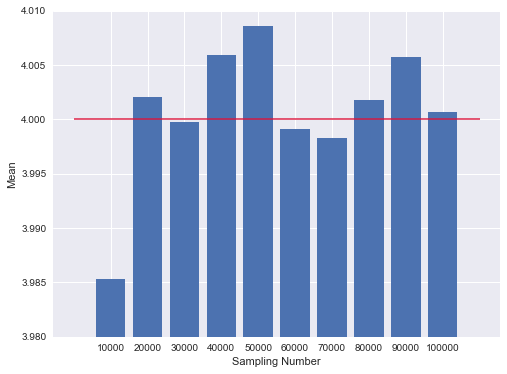

array([3.9853, 4.0021, 3.9998, 4.0059, 4.0086, 3.9991, 3.9983, 4.0018,
       4.0057, 4.0007])

In [31]:
li=[]
np.random.seed(0)
for i in range(10000,100001,10000):
    li.append(pop.rvs(i).mean().round(4))

plt.figure(figsize=(8,6))
plt.hlines(4,0,11,color='crimson',alpha=0.8) # 모평균 표시
plt.bar(np.arange(1,11),li,width=0.8)
plt.xticks(np.arange(1,11),np.arange(10000,100001,10000))
plt.ylim(3.98, 4.01)
plt.xlabel('Sampling Number')
plt.ylabel('Mean')
plt.show()
np.array(li)


Wall time: 27 s


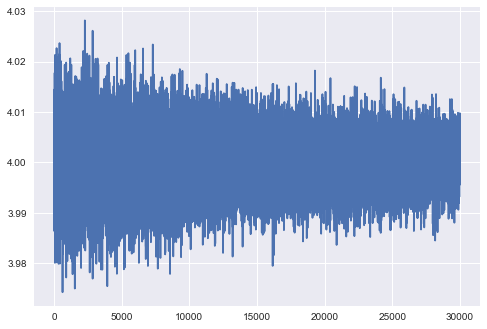

In [34]:
%%time
lst=[]
for i in range(10000,40000):
    lst.append(pop.rvs(i).mean())
lst
plt.plot(lst)

Text(0, 0.5, 'sample mean')

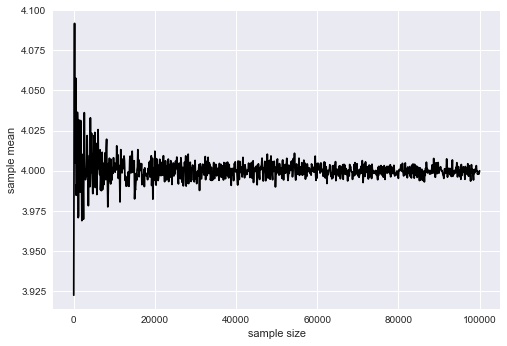

In [51]:
size_array = np.arange(10, 100100, 100)
len(size_array)
population = norm(loc = 4, scale = 0.8)
population.rvs(size = 10)

# 샘플사이즈를 변화시키면서 표본평균을 도출하는 시뮬레이션

np.random.seed(1)
sample_mean_array_size = np.zeros(len(size_array))

for i in range(0, len(size_array)):
    sample = population.rvs(size = size_array[i])
    sample_mean_array_size[i] = np.mean(sample)
sample_mean_array_size[:10]

# 샘플사이즈가 커질수록 표본평균이 모평균에 가까워짐

plt.plot(size_array, sample_mean_array_size, color = 'black')
plt.xlabel('sample size')
plt.ylabel('sample mean')

In [ ]:
# 실험

In [7]:
a = np.array((4 - 0.8, 4 + 0.8))

In [8]:
np.array(a).mean()
np.array(a).std()

0.7999999999999998

In [9]:
sample1.var()
sample1.std()

0.7736633688628288

array([1.   , 0.98 , 0.959, 0.939, 0.918, 0.898, 0.878, 0.857, 0.837,
       0.816, 0.796, 0.776, 0.755, 0.735, 0.714, 0.694, 0.673, 0.653,
       0.633, 0.612, 0.592, 0.571, 0.551, 0.531, 0.51 , 0.49 , 0.469,
       0.449, 0.429, 0.408, 0.388, 0.367, 0.347, 0.327, 0.306, 0.286,
       0.265, 0.245, 0.225, 0.204, 0.184, 0.163, 0.143, 0.123, 0.102,
       0.082, 0.061, 0.041, 0.02 , 0.   ])

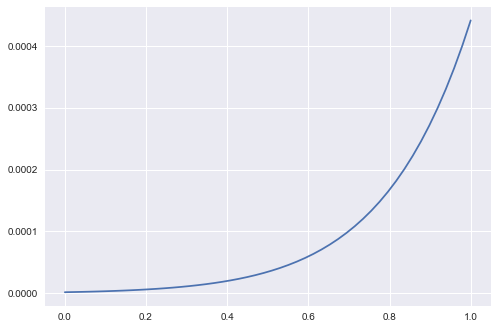

In [10]:
mu = 4
std = 0.8

norm_ = norm(4, 0.8)

x = np.linspace(norm_.cdf(9), norm_.cdf(1))
y = norm_.pdf(x)

plt.plot(x, y)
x.round(3)